In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [44]:
# Loading Datasets
reviews = pd.read_csv('airbnb_reviews_textblob.csv')
listing = pd.read_csv('airbnb_listing_imagereco.csv')

In [45]:
#Counting # of rows.
print(f"Reviews: {len(reviews.index)}")
print(f"Listing: {len(listing.index)}")

Reviews: 1486
Listing: 305


In [51]:
#Merge Listing and Reviews DF.
common = listing.merge(reviews, on=['id'])

In [54]:
##Cleaning listing and reviews with no match.
reviews = reviews[(reviews.id.isin(common.id))]
listing = listing[(listing.id.isin(common.id))]

In [55]:
#Counting # of rows after cleanning.
print(f"Reviews: {len(reviews.index)}")
print(f"Listing: {len(listing.index)}")

Reviews: 1348
Listing: 271


In [56]:
# Checking type of every column in the dataset
reviews.dtypes

id                    int64
author               object
rating                int64
comments             object
Polarity            float64
Sentiment            object
Keywords_reviews     object
dtype: object

In [57]:
# Checking type of every column in the dataset
listing.dtypes

id                         int64
city                      object
neighborhood              object
name                      object
lat                      float64
lng                      float64
person_capacity            int64
space_type                object
picture_url               object
price_rate                 int64
image_description         object
image_dominantfgColor     object
image_dominantbgColor     object
dtype: object

In [58]:
# Looking for null values
listing.isnull().sum()

id                       0
city                     0
neighborhood             0
name                     0
lat                      0
lng                      0
person_capacity          0
space_type               0
picture_url              0
price_rate               0
image_description        0
image_dominantfgColor    0
image_dominantbgColor    0
dtype: int64

In [59]:
reviews.isnull().sum()

id                   0
author               0
rating               0
comments             0
Polarity             0
Sentiment            0
Keywords_reviews    26
dtype: int64

In [60]:
# Examining the unique values and counting:
print(f"Neighborhoods: {len(listing.neighborhood.unique())}")
print(f"Space type: {len(listing.space_type.unique())}")

Neighborhoods: 43
Space type: 12


In [61]:
# Count of background colors
listing.image_dominantbgColor.value_counts()

White     123
Grey       82
Black      28
Brown      20
Blue       13
Green       3
Yellow      2
Name: image_dominantbgColor, dtype: int64

In [62]:
# Count of foreground colors
listing.image_dominantfgColor.value_counts()

White     125
Grey       82
Black      40
Brown      17
Yellow      2
Orange      2
Blue        1
Green       1
Red         1
Name: image_dominantfgColor, dtype: int64

In [79]:
# Grouping by fgcolor and bgcolor and counting number of unique groups.
listing.groupby(['image_dominantbgColor','image_dominantfgColor']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False)

,image_dominantbgColor,image_dominantfgColor,count
25,White,White,86
18,Grey,Grey,45
19,Grey,White,28
23,White,Grey,22
0,Black,Black,19
6,Blue,Grey,8
21,White,Black,8
9,Brown,Brown,7
12,Brown,White,6
15,Grey,Black,5


In [80]:
# Counting Sentiment values
reviews.Sentiment.value_counts()

Negative    824
Positve     499
Neutral      25
Name: Sentiment, dtype: int64

In [81]:
# Preparing to join both dataset:
# Size
print(f"Reviews: {len(reviews.index)}")
print(f"Listing: {len(listing.index)}")

Reviews: 1348
Listing: 271


Text(0.5, 1.0, 'Avg Polarity vs Foreground Color')

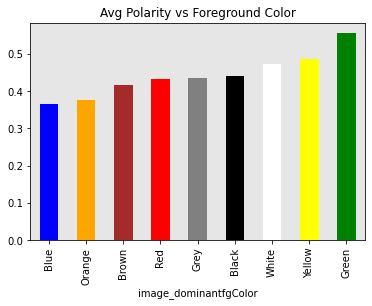

In [82]:
fgColor_Polarity = common.groupby(by='image_dominantfgColor')['Polarity'].mean().sort_values()
plot_fgColor_Polarity = fgColor_Polarity.plot(kind='bar', color=list(fgColor_Polarity.index.values))
plot_fgColor_Polarity.set_facecolor('0.90')
plot_fgColor_Polarity.set_title('Avg Polarity vs Foreground Color')
# reviews['Polarity'].loc[11533218].mean(axis=0)

Text(0.5, 1.0, 'Avg Polarity vs Background Color')

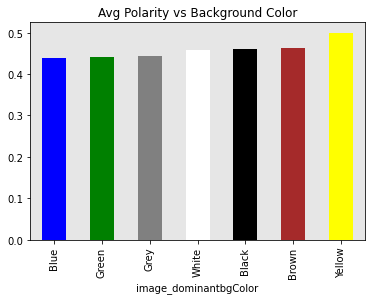

In [83]:
bgColor_Polarity = common.groupby(by='image_dominantbgColor')['Polarity'].mean().sort_values()
plot_bgColor_Polarity = bgColor_Polarity.plot(kind='bar', color=list(bgColor_Polarity.index.values))
plot_bgColor_Polarity.set_facecolor('0.90')
plot_bgColor_Polarity.set_title('Avg Polarity vs Background Color')

Text(0.5, 1.0, 'Avg Price vs Foreground Color')

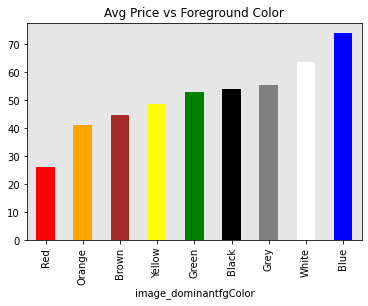

In [84]:
fgcolor_price = common.groupby(by='image_dominantfgColor')['price_rate'].mean().sort_values()
plot_fgcolor_price = fgcolor_price.plot(kind='bar', color=list(fgcolor_price.index.values))
plot_fgcolor_price.set_facecolor('0.90')
plot_fgcolor_price.set_title('Avg Price vs Foreground Color')

Text(0.5, 1.0, 'Avg Price vs Background Color')

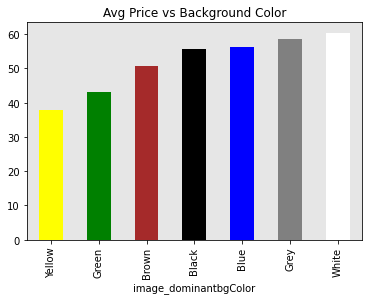

In [85]:
bgcolor_price = common.groupby(by='image_dominantbgColor')['price_rate'].mean().sort_values()
plot_bgcolor_price = bgcolor_price.plot(kind='bar', color=list(bgcolor_price.index.values))
plot_bgcolor_price.set_facecolor('0.90')
plot_bgcolor_price.set_title('Avg Price vs Background Color')

Text(0.5, 1.0, 'Polarity vs Background Color')

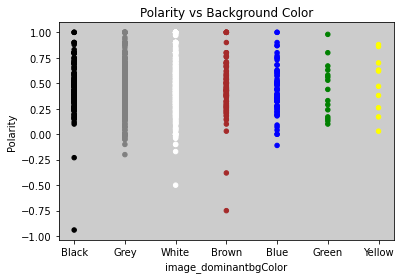

In [86]:
scatter_bgcolor_pol = common.reset_index().plot(kind='scatter', x='image_dominantbgColor', y='Polarity', c='image_dominantbgColor')
scatter_bgcolor_pol.set_facecolor('0.80')
scatter_bgcolor_pol.set_title('Polarity vs Background Color')

Text(0.5, 1.0, 'Polarity vs Foreground Color')

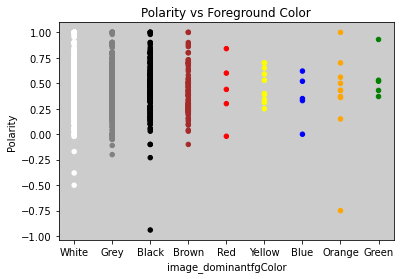

In [87]:
scatter_fgcolor_pol = common.reset_index().plot(kind='scatter', x='image_dominantfgColor', y='Polarity', c='image_dominantfgColor')
scatter_fgcolor_pol.set_facecolor('0.80')
scatter_fgcolor_pol.set_title('Polarity vs Foreground Color')

In [88]:
common.describe()

,id,lat,lng,person_capacity,price_rate,rating,Polarity
count,1.348000e+03,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,1.816534e+07,43.656215,-79.390411,3.135757,58.089021,4.712166,0.452901
std,8.342790e+06,0.021258,0.039300,1.473890,21.983515,0.662003,0.235778
min,3.903950e+05,43.596710,-79.536156,1.000000,11.000000,1.000000,-0.940000
25%,1.300173e+07,43.642490,-79.403710,2.000000,43.000000,5.000000,0.300000
50%,1.768274e+07,43.648440,-79.388740,3.000000,56.000000,5.000000,0.430000
75%,2.334274e+07,43.663213,-79.377455,4.000000,75.000000,5.000000,0.590000
max,3.929284e+07,43.738670,-79.229900,9.000000,139.000000,5.000000,1.000000


Text(0.5, 1.0, 'Price Rate vs Background Color')

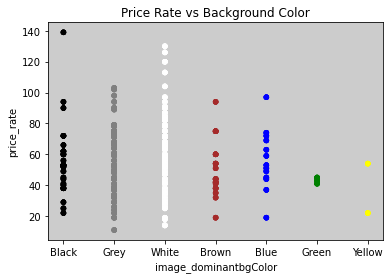

In [91]:
scatter_bgcolor_price = common.reset_index().plot(kind='scatter', x='image_dominantbgColor', y='price_rate', c='image_dominantbgColor')
scatter_bgcolor_price.set_facecolor('0.80')
scatter_bgcolor_price.set_title('Price Rate vs Background Color')

Text(0.5, 1.0, 'Price Rate vs Foreground Color')

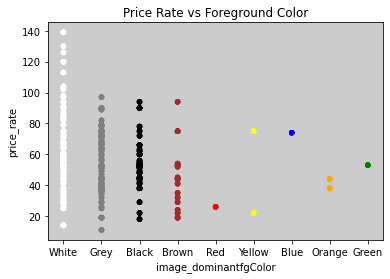

In [92]:
scatter_fgcolor_price = common.reset_index().plot(kind='scatter', x='image_dominantfgColor', y='price_rate', c='image_dominantfgColor')
scatter_fgcolor_price.set_facecolor('0.80')
scatter_fgcolor_price.set_title('Price Rate vs Foreground Color')